<a href="https://colab.research.google.com/github/tronghieu2810/DEEP-LEARNING/blob/main/UDEMY/%5BMike_X_Cohen%5D_Deep_understanding/FFN/DUDL_FFN_FFNonMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# For DL modeling
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F
import torch.nn as nn

# For number-crunching
import numpy as np
import scipy.stats as stats

# For dataset management
import pandas as pd
from sklearn.model_selection import train_test_split

# For data visualization
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')
import seaborn as sns

# For timing computations
import time

# Import and process the data

In [3]:
# Import dataset
mnist_dataset = np.loadtxt(open('sample_data/mnist_train_small.csv','rb'), delimiter=',')

#Extract labels (number IDs) and remove from data
labels = mnist_dataset[:, 0]
data   = mnist_dataset[:, 1:]

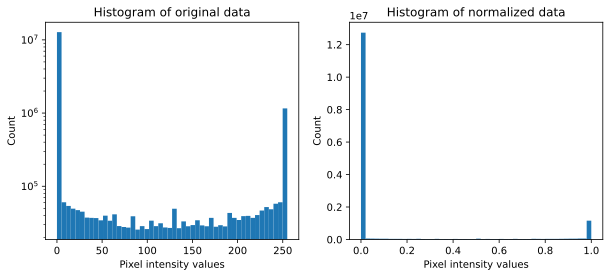

In [4]:
# Normalize the data to a range of [0, 1]
data_norm = data / np.max(data)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].hist(data.flatten(), 50)
ax[0].set_xlabel('Pixel intensity values')
ax[0].set_ylabel('Count')
ax[0].set_title('Histogram of original data')
ax[0].set_yscale('log')

ax[1].hist(data_norm.flatten(), 50)
ax[1].set_xlabel('Pixel intensity values')
ax[1].set_ylabel('Count')
ax[1].set_title('Histogram of normalized data')

plt.show()

# Create train/test groups using DataLoader

In [5]:
from sklearn.utils import shuffle
# Step 1: Convert to tensor
data_tensor   = torch.tensor(data_norm).float()
labels_tensor = torch.tensor(labels).long()

# Step 2: Use scikitlearn to split the data
train_data, test_data, train_labels, test_labels = \
    train_test_split(data_tensor, labels_tensor, test_size=0.1)

# Step 3: Convert into PyTorch Datasets
train_data_set = TensorDataset(train_data, train_labels)
test_data_set  = TensorDataset(test_data, test_labels)

# Step 4: Translate into Dataloader objects
batch_size   = 32
train_loader = DataLoader(dataset=train_data_set, batch_size=batch_size,
                          shuffle=True, drop_last=True)
test_loader  = DataLoader(dataset=test_data_set, 
                          batch_size=test_data_set.tensors[0].shape[0])

In [6]:
# check all variables in workspace
%whos

Variable           Type             Data/Info
---------------------------------------------
DataLoader         type             <class 'torch.utils.data.dataloader.DataLoader'>
F                  module           <module 'torch.nn.functio<...>/torch/nn/functional.py'>
TensorDataset      type             <class 'torch.utils.data.dataset.TensorDataset'>
ax                 ndarray          2: 2 elems, type `object`, 16 bytes
batch_size         int              32
data               ndarray          20000x784: 15680000 elems, type `float64`, 125440000 bytes (119.62890625 Mb)
data_norm          ndarray          20000x784: 15680000 elems, type `float64`, 125440000 bytes (119.62890625 Mb)
data_tensor        Tensor           tensor([[0., 0., 0.,  ...<...>, 0.,  ..., 0., 0., 0.]])
display            module           <module 'IPython.display'<...>ages/IPython/display.py'>
fig                Figure           Figure(720x288)
labels             ndarray          20000: 20000 elems, type `float64`, 1

# Create the DL model

In [7]:
def create_the_MNIST_net():

    class mnist_net(nn.Module):
        def __init__(self):
            super().__init__()

            # Input layer
            self.input = nn.Linear(784, 64)

            # Hidden layer
            self.fc1 = nn.Linear(64, 32)
            self.fc2 = nn.Linear(32, 32)

            # Output layer
            self.output = nn.Linear(32, 10)

        # Forward pass
        def forward(self, x):
            x = F.relu(self.input(x))
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))

            return torch.log_softmax(self.output(x), axis=1)
        
    # Create the model instance
    net = mnist_net()

    # Loss Function
    loss_func = nn.NLLLoss()

    # Optimizer
    optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

    return net, loss_func, optimizer


In [8]:
# Test the model with one batch
net, loss_func, optimizer = create_the_MNIST_net()

X, y = iter(train_loader).next()
y_hat = net(X)

# Values are log-prob of each number (0 - 9)
print(torch.exp(y_hat))

# Compute the loss
loss = loss_func(y_hat, y)
print(f'Loss: {loss}')

tensor([[0.0846, 0.0955, 0.1193, 0.1046, 0.0986, 0.1183, 0.0894, 0.0964, 0.0999,
         0.0934],
        [0.0862, 0.0938, 0.1185, 0.1070, 0.0977, 0.1184, 0.0893, 0.0967, 0.1002,
         0.0922],
        [0.0851, 0.0951, 0.1190, 0.1045, 0.0986, 0.1185, 0.0895, 0.0970, 0.0998,
         0.0930],
        [0.0855, 0.0943, 0.1188, 0.1053, 0.0988, 0.1184, 0.0893, 0.0972, 0.0997,
         0.0927],
        [0.0852, 0.0951, 0.1187, 0.1058, 0.0989, 0.1183, 0.0889, 0.0967, 0.0990,
         0.0935],
        [0.0855, 0.0941, 0.1188, 0.1056, 0.0982, 0.1186, 0.0892, 0.0976, 0.0997,
         0.0928],
        [0.0849, 0.0955, 0.1185, 0.1070, 0.0980, 0.1181, 0.0895, 0.0952, 0.1000,
         0.0933],
        [0.0853, 0.0949, 0.1188, 0.1051, 0.0987, 0.1180, 0.0894, 0.0967, 0.1001,
         0.0930],
        [0.0853, 0.0947, 0.1191, 0.1056, 0.0989, 0.1181, 0.0893, 0.0964, 0.0996,
         0.0930],
        [0.0852, 0.0951, 0.1188, 0.1059, 0.0987, 0.1181, 0.0891, 0.0965, 0.0992,
         0.0935],
        [0

# Create a function that trains the model

In [9]:
def train_the_model():
    """
    FFN_NONMNIST
    """
    
    num_epochs = 60

    # Create a new model
    net, loss_func, optimizer = create_the_MNIST_net()

    # Initialize
    losses    = torch.zeros(num_epochs)
    train_acc = []
    test_acc  = []

    # Loop over epochs
    for epoch_i in range(num_epochs):

        # Loop over training data batches
        batch_acc  = []
        batch_loss = [] 

        for X, y in train_loader:
            # Forward pass and loss
            y_hat = net(X)
            loss  = loss_func(y_hat,y)

            # Backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Loss from this batch
            batch_loss.append(loss.item())

            # Compute accuracy
            matches = torch.argmax(y_hat, axis=1) == y       # Booleans (True/False)
            matches_numeric = matches.float()                # Convert to numbers (1/0)
            accuracy_pct = 100 * torch.mean(matches_numeric) # Average and *100
            batch_acc.append(accuracy_pct)                   # Add to list of accuracies
        # End of batch loop.

        # Get the average training accuracy of the batches
        train_acc.append(np.mean(batch_acc))

        # The average losses accross the batches
        losses[epoch_i] = np.mean(batch_loss)

        # Test accuracy
        X, y = next(iter(test_loader)) # Extract X, y from dataloader
        y_hat = net(X)
        test_acc.append(100 * torch.mean((torch.argmax(y_hat, axis=1) == y).float()))

    # End epochs

    return train_acc, test_acc, losses, net

# Run the model and show the results!

In [10]:
train_acc, test_acc, losses, net = train_the_model()

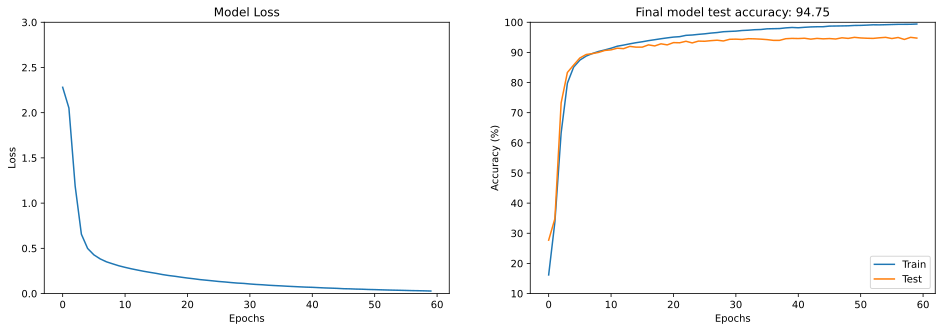

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].plot(losses)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_ylim([0, 3])
ax[0].set_title('Model Loss')

ax[1].plot(train_acc, label='Train')
ax[1].plot(test_acc, label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_ylim([10, 100])
ax[1].set_title(f'Final model test accuracy: {test_acc[-1]:.2f}')
ax[1].legend()

plt.show()

# Inspect the results in more detail

tensor([[6.8258e-09, 2.5512e-15, 6.1407e-12,  ..., 2.8443e-16, 2.9370e-06,
         7.4734e-13],
        [6.8559e-06, 1.5390e-11, 6.0614e-06,  ..., 2.3534e-12, 9.9999e-01,
         1.5420e-08],
        [1.6710e-08, 6.3322e-06, 9.9999e-01,  ..., 1.1033e-11, 3.1347e-06,
         4.9494e-17],
        ...,
        [2.4233e-07, 7.4518e-09, 1.6548e-09,  ..., 1.6336e-04, 3.9689e-05,
         1.2378e-01],
        [1.7933e-07, 7.6316e-01, 7.4989e-02,  ..., 3.7771e-02, 1.2330e-01,
         1.7722e-05],
        [3.9820e-06, 3.6053e-04, 6.0334e-05,  ..., 3.3528e-06, 9.9936e-01,
         5.5743e-05]])


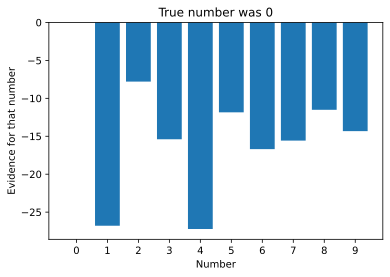

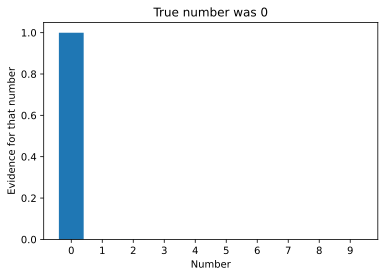

In [21]:
# Run the model through for the test data
X, y        = next(iter(test_loader))
predictions = net(X).detach()
print(torch.exp(predictions))
# Evidence for all numbers from one sample
sample_2_show = 120

plt.bar(range(10), predictions[sample_2_show])
plt.xticks(range(10))
plt.xlabel('Number')
plt.ylabel('Evidence for that number')
plt.title(f'True number was {y[sample_2_show].item()}')
plt.show()

plt.bar(range(10), torch.exp(predictions[sample_2_show]))
plt.xticks(range(10))
plt.xlabel('Number')
plt.ylabel('Evidence for that number')
plt.title(f'True number was {y[sample_2_show].item()}')
plt.show()

[  30   49   68   82  122  166  169  171  182  259  276  281  304  313
  336  340  343  354  362  381  389  391  460  479  498  563  578  581
  584  624  644  659  683  684  737  742  746  749  767  791  804  812
  821  825  826  844  849  852  859  914  969  978  982 1031 1042 1070
 1077 1081 1097 1106 1110 1140 1152 1170 1172 1197 1233 1255 1262 1278
 1294 1321 1368 1398 1399 1407 1422 1468 1500 1554 1571 1601 1615 1618
 1624 1640 1660 1682 1686 1727 1731 1745 1773 1778 1810 1855 1882 1907
 1926 1933 1956 1961 1963 1981 1992]


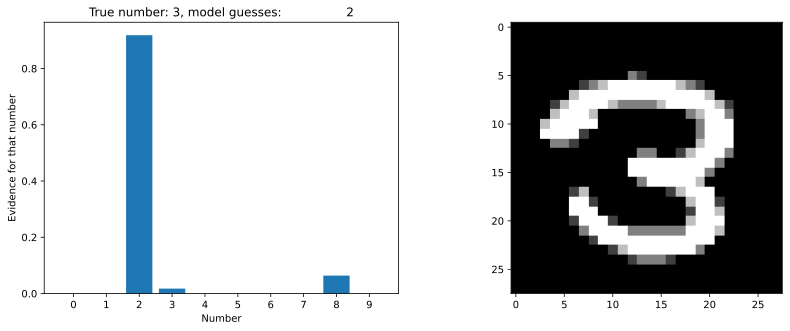

In [22]:
# Find the errors
errors = np.where(torch.max(predictions, axis=1)[1] != y)[0]
print(errors)

# Evidence for all numbers from one sample
sample_2_show = 4

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].bar(range(10), np.exp(predictions[errors[sample_2_show]]))
ax[0].set_xticks(range(10))
ax[0].set_xlabel('Number')
ax[0].set_ylabel('Evidence for that number')
ax[0].set_title(f'True number: {y[errors[sample_2_show]].item()}, model guesses: \
                {torch.argmax(predictions[errors[sample_2_show]]).item()}')

ax[1].imshow( np.reshape(X[errors[sample_2_show],:],(28,28)), cmap='gray')

# Additional explorations

In [15]:
# 1) Average together the correct 7's and the error 7's, and make images of them (that is, one image
#    of all correct 7's and one image of all incorrectly labeled 7's). How do they look?
# 
# 2) Repeat #1 for all numbers to produce a 2x10 matrix of images with corrects on top
#    and errors on the bottom.
# 
# 3) Identify "almost errors," which we can define as correct categorizations that had a probability of
#    e.g., >.1 for any other number. Make images of some of these numbers. Can you understand why the model
#    was confused?
# 
# 4) I didn't use .train(), .eval(), or no_grad() here. Is that a problem? Can you add those in without checking
#    other notebooks?
# 